# CC5205-3 · Minería de Datos
## Hito 1 · Semestre 2025-1

### Integrantes
- Sofía Carmona F.
- Tomás Ubilla Zavala  
- Loonette Vilelgas B.
- Diego Rojas Wasaff  
- Nahuel Won
### Equipo Docente
- Profesor: Valentín Barriere  
- Auxiliar: Roberto Rivera C.

---


## Introducción

---
 Spotify es una de las plataformas de streaming musicales más grandes del mundo. Este guarda enormes cantidades de datos sobre canciones, artistas, álbumes, características melódicas, entre otras. Analizar y estudiar estos datos ayuda a conocer mejor patrones musicales, cómo distintas canciones se relacionan entre sí y cómo organizar estas distintas melodías. Para ello, se analiza un dataset de 114,000 canciones de Spotify, creada por Priyam Choksi, que incluyen variables como popularidad, energía, valencia, tiempo, género, entre otras. El análisis de estos datos es interesante porque ayuda a entender y predecir patrones musicales y agrupar canciones según distintas variables mediante distintas técnicas como el clustering. 

## Exploración de datos

---


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
spotify = pd.read_csv("data/data_principal.csv")

In [19]:
spotify.describe(include='all')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,114000.000000,114000,113999,113999,113999,114000.000000,1.140000e+05,114000,114000.000000,114000.000000,...,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000
unique,NaN,89741,31437,46589,73608,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,104253,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.500000,NaN,NaN,NaN,NaN,33.238535,2.280292e+05,NaN,0.566800,0.641383,...,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,NaN
std,32909.109681,NaN,NaN,NaN,NaN,22.305078,1.072977e+05,NaN,0.173542,0.251529,...,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.750000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,NaN,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,NaN
50%,56999.500000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,NaN,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.250000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,NaN,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


Se puede observar las columnas y cuantas filas tiene cada una; el promedio, la varianza , el mínimo, el máximo y los percentiles de las variables numéricas del dataset.

In [20]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

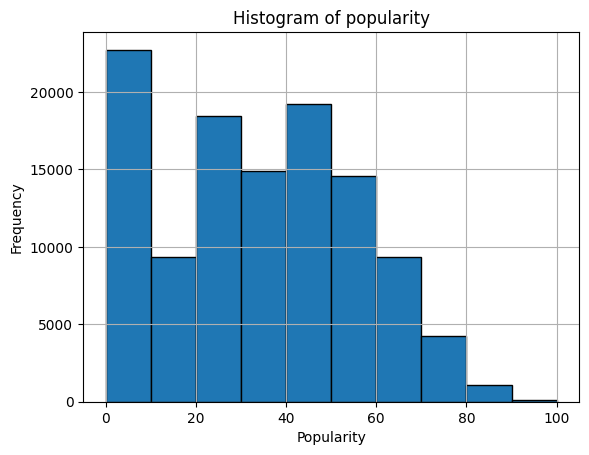

In [21]:
# Histograma de popularidad de las canciones
hist = spotify['popularity'].hist(bins = 10, edgecolor='black')

plt.title('Histogram of popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

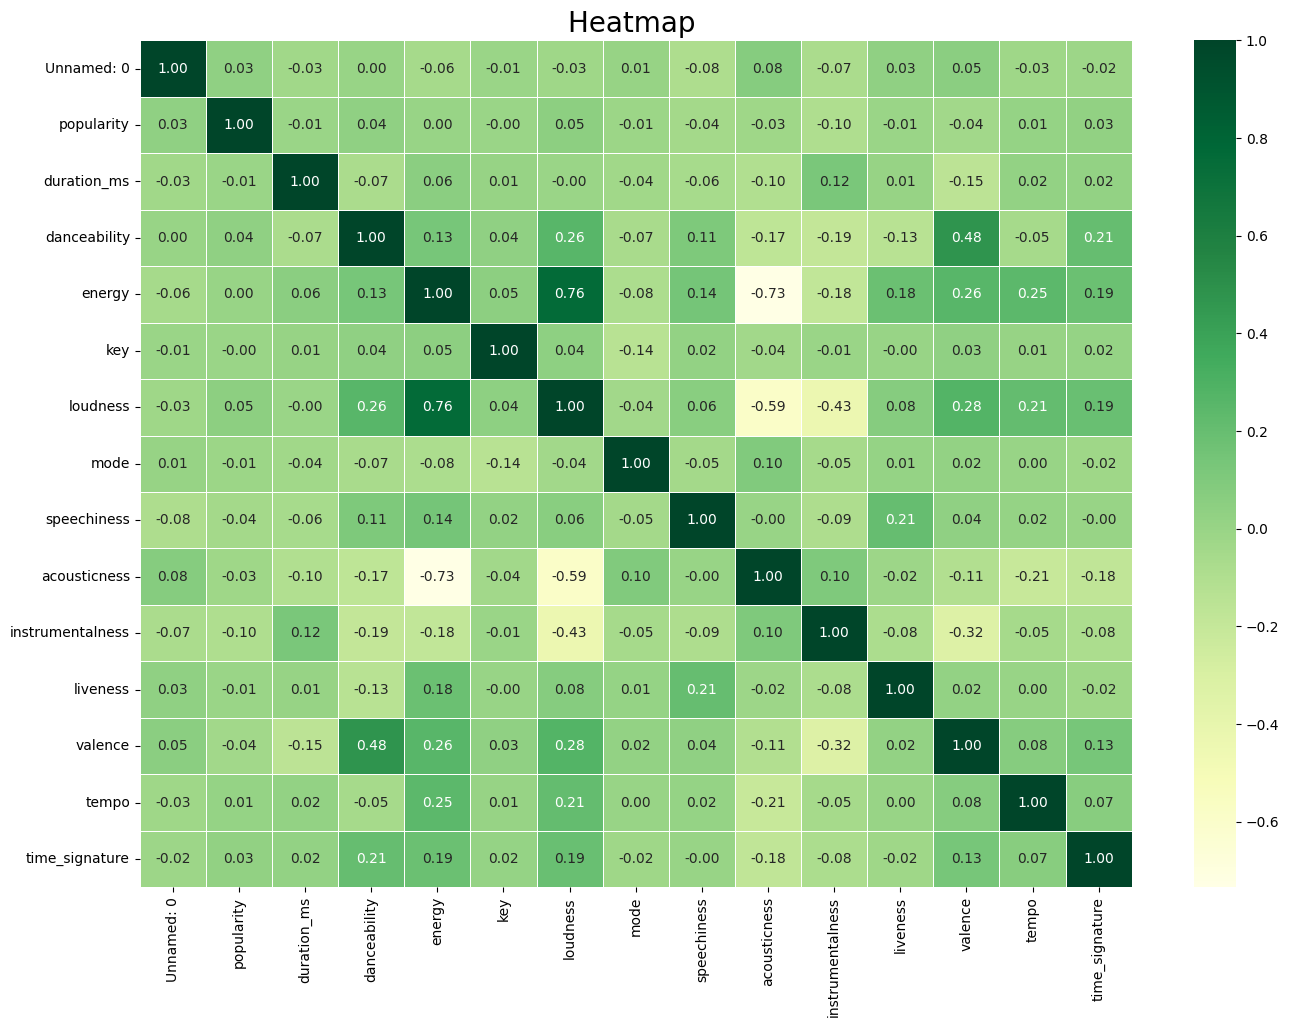

In [22]:
##HeatMap para todas las correlaciones de los atributos de la tabla
##Estudio de las correlaciones entre atributos

numeric_cols = spotify.select_dtypes(include=['number']).columns

f, ax = plt.subplots(figsize=(16, 11))

corr_matrix = spotify[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='YlGn', annot=True, fmt=".2f", linewidths=.5)



plt.title('Heatmap ', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


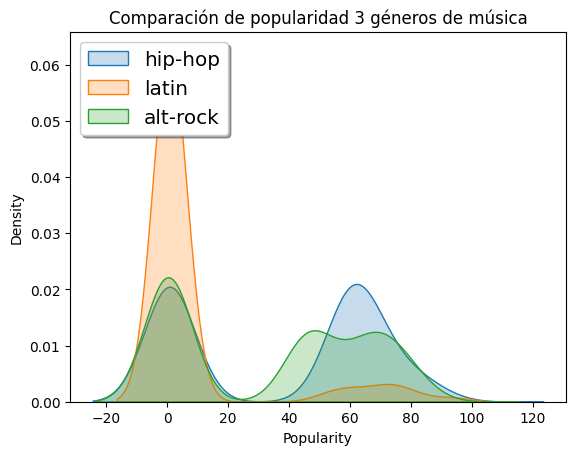

In [23]:
fig, ax = plt.subplots()

hip_hop = spotify[spotify['track_genre'] == 'hip-hop']
latin = spotify[spotify['track_genre'] == 'latin']
rock = spotify[spotify['track_genre'] == 'alt-rock']
sns.kdeplot(hip_hop['popularity'], label='hip-hop', ax=ax, fill=True)
sns.kdeplot(latin['popularity'], label='latin', ax=ax, fill=True)
sns.kdeplot(rock['popularity'], label='alt-rock', ax=ax, fill=True)

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

ax.set_title('Comparación de popularidad 3 géneros de música')
ax.set_xlabel('Popularity') # Update x-axis label

plt.show()

## Preguntas y Problemas

---
* ¿Aplicar Clustering permite generar grupos que aporten información al modelo?
* ¿Se puede predecir el género de una canción en base a otras variables?
* ¿Cómo varía el sentimiento predominante de las canciones de los diferentes géneros?


## Propuesta experimental

---
# P1

## P2


Para responder la pregunta: ¿Aplicar Clustering permite generar grupos que aporten información al modelo?; preprocesaremos los datos para aplicar clustering(sampling y escalado) con los algoritmos K-Means y DBSCAN, en apoyo de una buena valorización utilizando métricas como la de silhouette_score o técnicas como la del método del codo.




## P3

## Experimento preliminar

---

## P1

## P2

Se toma una muestra de 10,000 canciones aleatorias (8-9% de la muestra total). Se ocupan solo los datos numéricos ya que nuestra misión es aplicar clustering y no es posible con datos no numéricos. Se preprocesan los datos como la limpieza de valores nulos. Antes de aplicar un cluster con el método K-Means, decidimos aplicar el método del codo para encontrar el valor de k óptimo. El algoritmo nos entregó que el k óptimo se daba para k=3. Luego aplicamos el método K-Means para k=3 con dos componentes de PCA aplicadas a las 11 columnas. Este nos dió un silhouette_score de 0.39, la cual nos indica que es un cluster razonable pero perfectible. Despúes, ocupamos otro clustering K-Means pero esta vez con 2 columnas con el fin de analizar una relación más clara entre estas. Este también entregó un silhouette_score de 0.39. Finalmente ocupamos un nuevo método para contrastar con el K-Means para ver si es un mejor método para agrupar los datos. Ocupamos el método DBSCAN con la misma metodología anterior: con PCA nos dió un silhouette_score de 0.07 y con los dos variables no se pudo detectar distintos clusters.  
  
Con respecto de haber ocupado K-Means nos pareció adecuado ocupar este método ya que pudimos observar en el gráfico que los clusters se distinguen unos con otros y además el silhouette_score es una métrica que nos permite calificar la calidad de nuestros clusters la cual se puede considerar adecuado y trabajable.  
  
Sobre DBSCAN no nos pareció adecuado puesto que nos generó un silhouette_score muy bajo y el en gráfico que generaba no se podía distinguir bien los distintos clusters. Quizás esto se puede haber debido al preprocesamiento o al mal cálculo de EPS o min samples, también se podría considerar que como este método trabaja con densidades, la alta dimensionalidad es un variable a considerar.

### KMeans con PCA ###
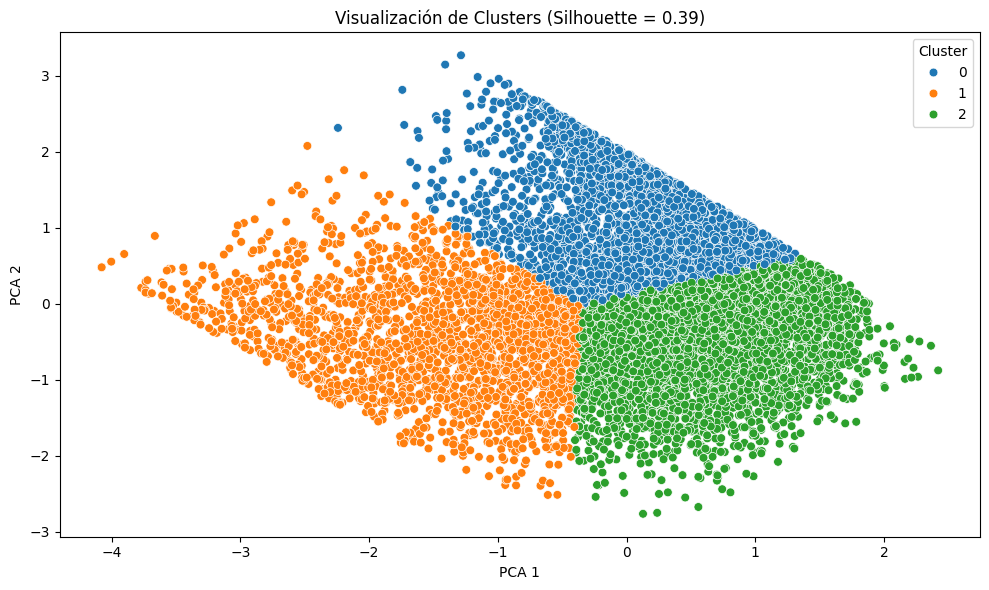

### KMeans con 2 variables (sin PCA)
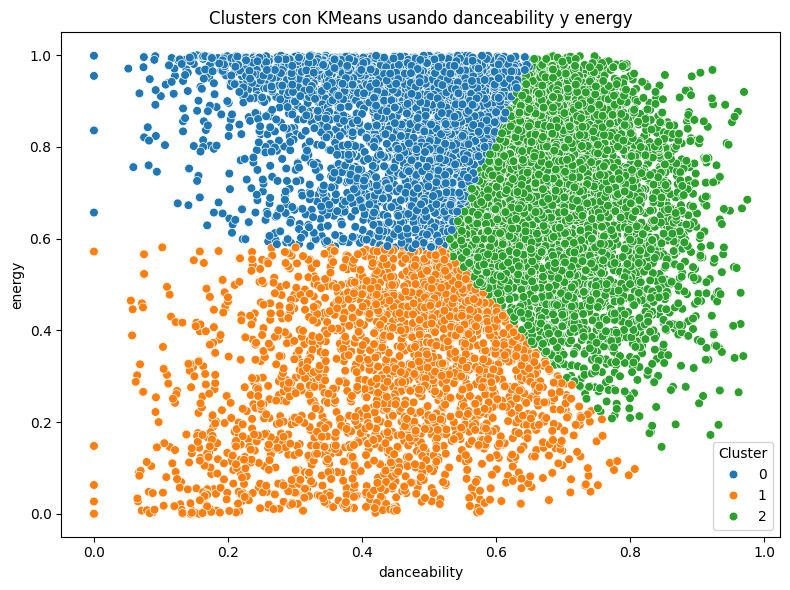

### DBSCAN con PCA
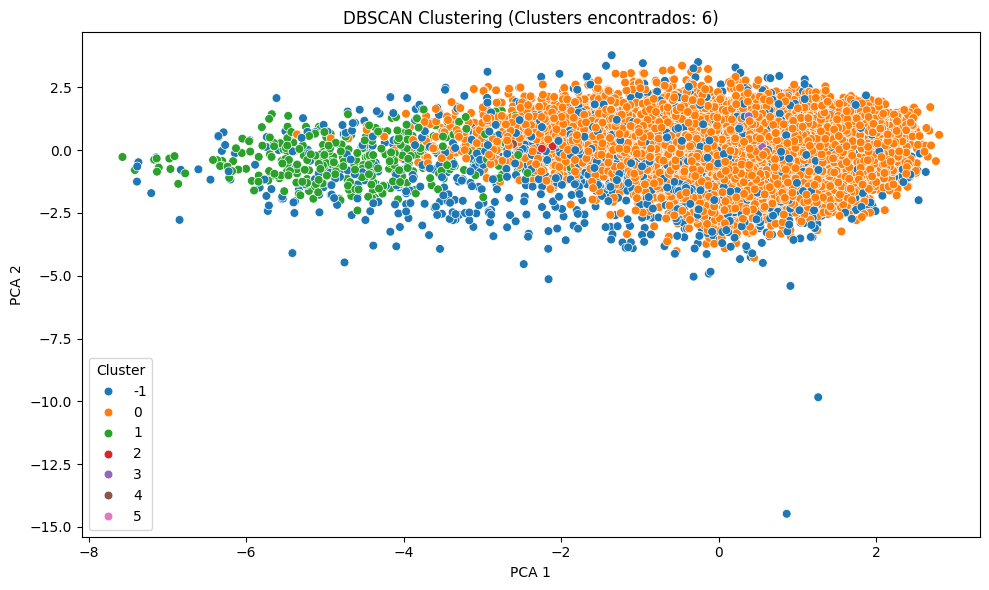

### DBSCAN con 2 variables (sin PCA)
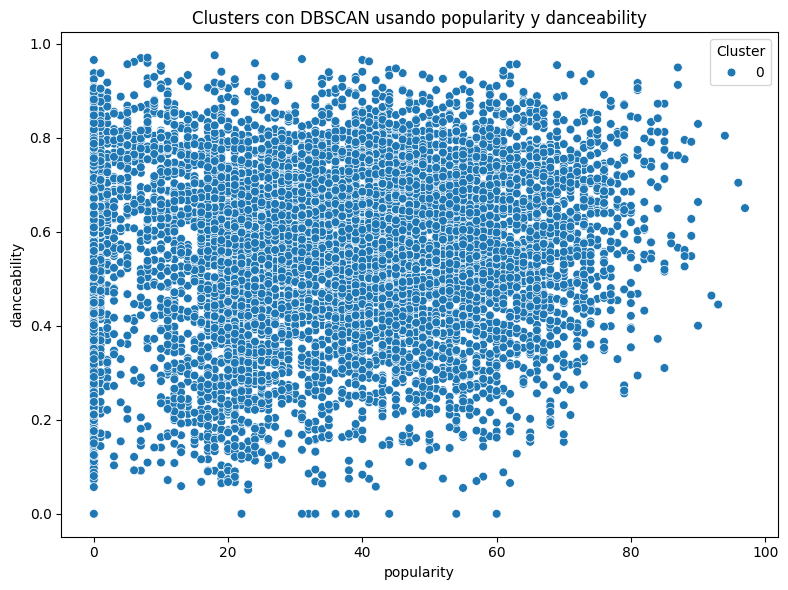

## P3

## Anexos

---